In [1]:
# Install genetic Algorithm python library to run feature selection
# !pip install geneticalgorithm

In [1]:
import numpy as np
import pandas as pd 
import os
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from dateutil.parser import parse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score 
from geneticalgorithm import geneticalgorithm as ga

In [2]:
#Reset Pandas to show all rows & columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Loading First Dataset

In [3]:
#Loading the first dataset with 85 features
first_dataset = pd.read_csv("./CIC-ToN-IoT/data/CIC-ToN-IoT.csv")
#Loading the first dataset with 85 features
first_dataset_features = pd.read_csv("./CIC-ToN-IoT/data/CICFLowMeter_Features.csv")

In [4]:
#Displaying the description of the first dataset
first_dataset_features

,Feature,Description
0,fl_dur,Flow duration
1,tot_fw_pk,Total packets in the forward direction
2,tot_bw_pk,Total packets in the backward direction
3,tot_l_fw_pkt,Total size of packet in forward direction
4,fw_pkt_l_max,Maximum size of packet in forward direction
5,fw_pkt_l_min,Minimum size of packet in forward direction
6,fw_pkt_l_avg,Average size of packet in forward direction
7,fw_pkt_l_std,Standard deviation size of packet in forward d...
8,Bw_pkt_l_max,Maximum size of packet in backward direction
9,Bw_pkt_l_min,Minimum size of packet in backward direction


In [5]:
#Showing the first 10 entries in the first dataset
first_dataset.head(10)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
0,177.30.87.144-192.168.1.1-0-0-0,177.30.87.144,0,192.168.1.1,0,0,25/04/2019 05:18:52 pm,47814343,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104571,1.195359e+07,1.433437e+07,30203068.0,14.0,47814343.0,1.195359e+07,1.433437e+07,30203068.0,14.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.104571,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1038036.0,0.000000e+00,1038036.0,1038036.0,5.187256e+14,8.984590e+14,1.556177e+15,1.657324e+07,0,Benign
1,167.49.176.28-50.165.192.168-0-0-0,167.49.176.28,0,50.165.192.168,0,0,25/04/2019 05:18:49 pm,2033142,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.983699,2.033142e+06,0.000000e+00,2033142.0,2033142.0,2033142.0,2.033142e+06,0.000000e+00,2033142.0,2033142.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.983699,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,0,Benign
2,230.158.52.59-177.21.192.168-0-0-0,230.158.52.59,0,177.21.192.168,0,0,25/04/2019 05:18:37 pm,82877133,14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168925,6.375164e+06,4.413120e+06,12563772.0,226402.0,82877133.0,6.375164e+06,4.413120e+06,12563772.0,226402.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.168925,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1931160.5,1.711593e+06,3942470.0,226402.0,1.729085e+14,5.187256e+14,1.556177e+15,6.036493e+06,0,Benign
3,183.68.192.168-1.1.192.168-0-0-0,183.68.192.168,0,1.1.192.168,0,0,25/04/2019 05:18:42 pm,24359,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.105177,2.435900e+04,0.000000e+00,24359.0,24359.0,24359.0,2.435900e+04,0.000000e+00,24359.0,24359.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,82.105177,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,0,Benign
4,183.41.192.168-1.1.192.168-0-0-0,183.41.192.168,0,1.1.192.168,0,0,25/04/2019 05:18:42 pm,10239351,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292987,5.119676e+06,1.507128e+06,6185376.0,4053975.0,10239351.0,5.119676e+06,1.507128e+06,6185376.0,4053975.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.292987,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4053975.0,0.000000e+00,4053975.0,4053975.0,7.780884e+14,1.100383e+15,1.556177e+15,6.185376e+06,0,Benign
5,230.161.52.59-177.21.192.168-0-0-0,230.161.52.59,0,177.21.192.168,0,0,25/04/2019 05:19:00 pm,28816963,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138807,9.605654e+06,9.179819e+06,18345044.0,41118.0,28816963.0,9.605654e+06,9.179819e+06,18345044.0,41118.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.138807,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,41118.0,0.000000e+00,41118.0,41118.0,5.187256e+14,8.984591e+14,1.556177e+15,1.043080e+07,0,Beni

In [6]:
#Getting the dataset Info (datatypes and number of features/columns)
first_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5351760 entries, 0 to 5351759
Data columns (total 85 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Flow ID            object 
 1   Src IP             object 
 2   Src Port           int64  
 3   Dst IP             object 
 4   Dst Port           int64  
 5   Protocol           int64  
 6   Timestamp          object 
 7   Flow Duration      int64  
 8   Tot Fwd Pkts       int64  
 9   Tot Bwd Pkts       int64  
 10  TotLen Fwd Pkts    float64
 11  TotLen Bwd Pkts    float64
 12  Fwd Pkt Len Max    float64
 13  Fwd Pkt Len Min    float64
 14  Fwd Pkt Len Mean   float64
 15  Fwd Pkt Len Std    float64
 16  Bwd Pkt Len Max    float64
 17  Bwd Pkt Len Min    float64
 18  Bwd Pkt Len Mean   float64
 19  Bwd Pkt Len Std    float64
 20  Flow Byts/s        float64
 21  Flow Pkts/s        float64
 22  Flow IAT Mean      float64
 23  Flow IAT Std       float64
 24  Flow IAT Max       float64
 25  Flow IAT Min      

## Checking For Empty, missing, Infinite or duplicates in first dataset

In [7]:
#Check for instances in the dataset that are not available
first_dataset.isna().sum()

Flow ID              0
Src IP               0
Src Port             0
Dst IP               0
Dst Port             0
Protocol             0
Timestamp            0
Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd PSH Flags        0
Bwd PSH Flags        0
Fwd URG Flags        0
Bwd URG Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s 

In [8]:
#Check for empty instances in the dataset
first_dataset.isnull().sum()

Flow ID              0
Src IP               0
Src Port             0
Dst IP               0
Dst Port             0
Protocol             0
Timestamp            0
Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd PSH Flags        0
Bwd PSH Flags        0
Fwd URG Flags        0
Bwd URG Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s 

In [9]:
# Check for infinity values
first_dataset.isin([np.inf, -np.inf]).any()

Flow ID              False
Src IP               False
Src Port             False
Dst IP               False
Dst Port             False
Protocol             False
Timestamp            False
Flow Duration        False
Tot Fwd Pkts         False
Tot Bwd Pkts         False
TotLen Fwd Pkts      False
TotLen Bwd Pkts      False
Fwd Pkt Len Max      False
Fwd Pkt Len Min      False
Fwd Pkt Len Mean     False
Fwd Pkt Len Std      False
Bwd Pkt Len Max      False
Bwd Pkt Len Min      False
Bwd Pkt Len Mean     False
Bwd Pkt Len Std      False
Flow Byts/s          False
Flow Pkts/s           True
Flow IAT Mean        False
Flow IAT Std         False
Flow IAT Max         False
Flow IAT Min         False
Fwd IAT Tot          False
Fwd IAT Mean         False
Fwd IAT Std          False
Fwd IAT Max          False
Fwd IAT Min          False
Bwd IAT Tot          False
Bwd IAT Mean         False
Bwd IAT Std          False
Bwd IAT Max          False
Bwd IAT Min          False
Fwd PSH Flags        False
B

In [10]:
# The columns with infinte are 
print("The columns with infinite are - ", first_dataset.columns[first_dataset.isin([np.inf, -np.inf]).any()])

The columns with infinite are -  Index(['Flow Pkts/s'], dtype='object')


In [11]:
# Replace infinite values with zeros
first_dataset.replace([np.inf, -np.inf], 0, inplace=True)

In [12]:
first_dataset.nunique()

Flow ID              1178337
Src IP                142427
Src Port               39952
Dst IP                  1845
Dst Port               23167
Protocol                   3
Timestamp             144054
Flow Duration        1200680
Tot Fwd Pkts            1820
Tot Bwd Pkts             737
TotLen Fwd Pkts         5356
TotLen Bwd Pkts         5727
Fwd Pkt Len Max         1339
Fwd Pkt Len Min         1070
Fwd Pkt Len Mean       15958
Fwd Pkt Len Std        21038
Bwd Pkt Len Max         1388
Bwd Pkt Len Min         1171
Bwd Pkt Len Mean       12488
Bwd Pkt Len Std        16860
Flow Byts/s          1867914
Flow Pkts/s          1749693
Flow IAT Mean        1830439
Flow IAT Std         2544550
Flow IAT Max          978393
Flow IAT Min          330814
Fwd IAT Tot          1149827
Fwd IAT Mean         1482985
Fwd IAT Std          1827925
Fwd IAT Max           935642
Fwd IAT Min           329693
Bwd IAT Tot           476422
Bwd IAT Mean          750337
Bwd IAT Std          1336267
Bwd IAT Max   

In [13]:
# Check for duplicates on each row.
first_dataset.duplicated().value_counts()

False    5351760
Name: count, dtype: int64

In [14]:
# Show all the columns in first dataset
first_dataset.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE 

Attack
Benign        2515236
xss           2149308
password       340208
injection      277696
scanning        36205
backdoor        27145
ransomware       5098
mitm              517
ddos              202
dos               145
Name: count, dtype: int64


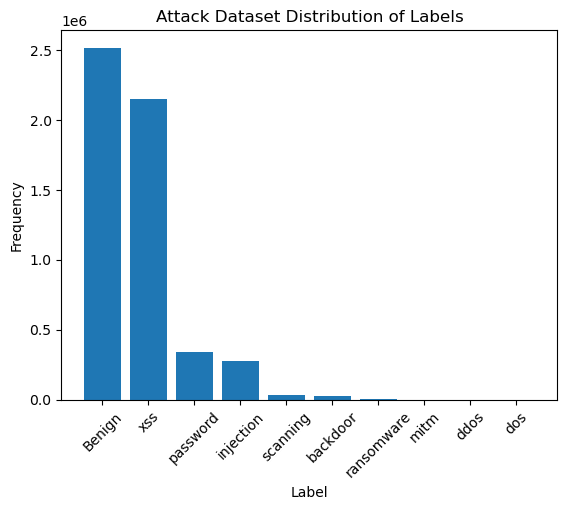

In [15]:
#The class distribution in the first dataset

# Define the desired label arrangement
desired_labels = ['Benign', 'xss', 'password', 'injection', 'scanning', "backdoor", "ransomware", "mitm", "ddos", "dos"]

# Count the frequency of each label
label_counts = first_dataset['Attack'].value_counts()
print(label_counts.reindex(desired_labels))

# Define the colors for each bar
# colors = ['skyblue', 'green', 'yellow', 'orange', 'gray']

# Reorder the label counts based on the desired arrangement
label_counts_ordered = label_counts.reindex(desired_labels)

# Plot the bar chart
plt.bar(label_counts_ordered.index, label_counts_ordered.values)

# Plot the bar chart
# plt.bar(label_counts.index, label_counts.values, color=colors)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Attack Dataset Distribution of Labels')
plt.xticks(rotation = 45)

# Show the plot
plt.show()


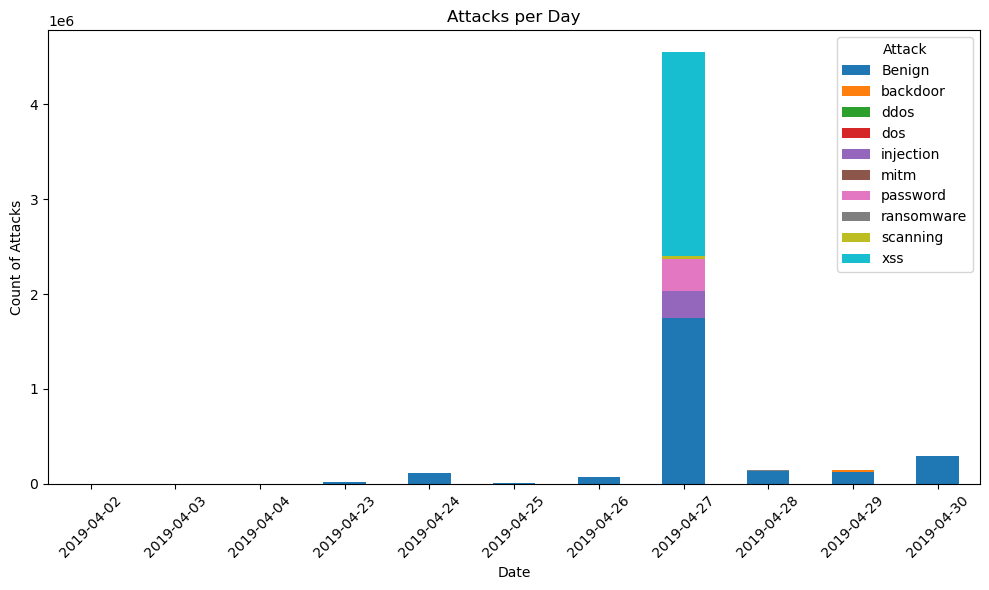

In [16]:
# Plot events per day 
# Seperate attack and date from 

# Convert the "Timestamp" column to datetime format
first_dataset_date_attack = pd.DataFrame(first_dataset, columns=["Timestamp", "Attack"])
first_dataset_date_attack['Timestamp'] = pd.to_datetime(first_dataset_date_attack['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')

# Extract the date by date from the datetime object
first_dataset_date_attack['Timestamp'] = first_dataset_date_attack['Timestamp'].dt.date

# Group the data by Timestamp, and count the occurrences of each Cat/Attack
first_dataset_events_per_day = first_dataset_date_attack.groupby(['Timestamp', 'Attack']).size().unstack(fill_value=0)

# Plot the multiple bar chart
first_dataset_events_per_day.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Count of Attacks')
plt.title('Attacks per Day')
plt.legend(title='Attack')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [17]:
# Validating content in the chart by sorting 
sorted_date_attack = first_dataset_date_attack.value_counts().sort_index()
sorted_date_attack

Timestamp   Attack    
2019-04-02  Benign            280
2019-04-03  Benign            813
2019-04-04  Benign            601
2019-04-23  Benign          20485
2019-04-24  Benign         114480
2019-04-25  Benign          12540
2019-04-26  Benign          76019
2019-04-27  Benign        1749122
            injection      277689
            password       340206
            scanning        36176
            xss           2149308
2019-04-28  Benign         130127
            backdoor         5006
            ransomware       5098
2019-04-29  Benign         118417
            backdoor        22139
            ddos              202
            dos               145
            injection           7
            mitm              489
            password            2
            scanning           29
2019-04-30  Benign         292352
            mitm               28
Name: count, dtype: int64

In [18]:
# Validating content in the chart showing each attacks per day and representing those not recoreded has zero
first_dataset_events_per_day

Attack,Benign,backdoor,ddos,dos,injection,mitm,password,ransomware,scanning,xss
Timestamp,,,,,,,,,,
2019-04-02,280,0,0,0,0,0,0,0,0,0
2019-04-03,813,0,0,0,0,0,0,0,0,0
2019-04-04,601,0,0,0,0,0,0,0,0,0
2019-04-23,20485,0,0,0,0,0,0,0,0,0
2019-04-24,114480,0,0,0,0,0,0,0,0,0
2019-04-25,12540,0,0,0,0,0,0,0,0,0
2019-04-26,76019,0,0,0,0,0,0,0,0,0
2019-04-27,1749122,0,0,0,277689,0,340206,0,36176,2149308
2019-04-28,130127,5006,0,0,0,0,0,5098,0,0


#### Cleaning the first dataset 

In [19]:
# First drop the "label" column and renaming the columns removing the space and replacing it with "_"
#Dropping the "label" column
cleaned_first_dataset = first_dataset.drop('Label', axis=1)
#Renaming the columns
cleaned_first_dataset.columns = cleaned_first_dataset.columns.str.replace(' ', '_') 

In [20]:
# Displaying the first five rows to verify changes 
cleaned_first_dataset.head(5)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack
0,177.30.87.144-192.168.1.1-0-0-0,177.30.87.144,0,192.168.1.1,0,0,25/04/2019 05:18:52 pm,47814343,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104571,1.195359e+07,1.433437e+07,30203068.0,14.0,47814343.0,1.195359e+07,1.433437e+07,30203068.0,14.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.104571,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1038036.0,0.000000e+00,1038036.0,1038036.0,5.187256e+14,8.984590e+14,1.556177e+15,1.657324e+07,Benign
1,167.49.176.28-50.165.192.168-0-0-0,167.49.176.28,0,50.165.192.168,0,0,25/04/2019 05:18:49 pm,2033142,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.983699,2.033142e+06,0.000000e+00,2033142.0,2033142.0,2033142.0,2.033142e+06,0.000000e+00,2033142.0,2033142.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.983699,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,Benign
2,230.158.52.59-177.21.192.168-0-0-0,230.158.52.59,0,177.21.192.168,0,0,25/04/2019 05:18:37 pm,82877133,14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168925,6.375164e+06,4.413120e+06,12563772.0,226402.0,82877133.0,6.375164e+06,4.413120e+06,12563772.0,226402.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.168925,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1931160.5,1.711593e+06,3942470.0,226402.0,1.729085e+14,5.187256e+14,1.556177e+15,6.036493e+06,Benign
3,183.68.192.168-1.1.192.168-0-0-0,183.68.192.168,0,1.1.192.168,0,0,25/04/2019 05:18:42 pm,24359,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.105177,2.435900e+04,0.000000e+00,24359.0,24359.0,24359.0,2.435900e+04,0.000000e+00,24359.0,24359.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,82.105177,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,Benign
4,183.41.192.168-1.1.192.168-0-0-0,183.41.192.168,0,1.1.192.168,0,0,25/04/2019 05:18:42 pm,10239351,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292987,5.119676e+06,1.507128e+06,6185376.0,4053975.0,10239351.0,5.119676e+06,1.507128e+06,6185376.0,4053975.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.292987,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4053975.0,0.000000e+00,4053975.0,4053975.0,7.780884e+14,1.100383e+15,1.556177e+15,6.185376e+06,Benign


In [21]:
# Rename Benign and ddos in Attack column to normal and dos and change all attacks to lowercase 
cleaned_first_dataset["Attack"] = cleaned_first_dataset["Attack"].str.replace("ddos", "dos")
cleaned_first_dataset["Attack"] = cleaned_first_dataset["Attack"].str.replace("Benign", "normal")
cleaned_first_dataset["Attack"] = cleaned_first_dataset["Attack"].str.lower()

In [22]:
# Displaying the first five rows to verify changes 
cleaned_first_dataset.head(5)


,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack
0,177.30.87.144-192.168.1.1-0-0-0,177.30.87.144,0,192.168.1.1,0,0,25/04/2019 05:18:52 pm,47814343,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104571,1.195359e+07,1.433437e+07,30203068.0,14.0,47814343.0,1.195359e+07,1.433437e+07,30203068.0,14.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.104571,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1038036.0,0.000000e+00,1038036.0,1038036.0,5.187256e+14,8.984590e+14,1.556177e+15,1.657324e+07,normal
1,167.49.176.28-50.165.192.168-0-0-0,167.49.176.28,0,50.165.192.168,0,0,25/04/2019 05:18:49 pm,2033142,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.983699,2.033142e+06,0.000000e+00,2033142.0,2033142.0,2033142.0,2.033142e+06,0.000000e+00,2033142.0,2033142.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.983699,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,normal
2,230.158.52.59-177.21.192.168-0-0-0,230.158.52.59,0,177.21.192.168,0,0,25/04/2019 05:18:37 pm,82877133,14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168925,6.375164e+06,4.413120e+06,12563772.0,226402.0,82877133.0,6.375164e+06,4.413120e+06,12563772.0,226402.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.168925,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1931160.5,1.711593e+06,3942470.0,226402.0,1.729085e+14,5.187256e+14,1.556177e+15,6.036493e+06,normal
3,183.68.192.168-1.1.192.168-0-0-0,183.68.192.168,0,1.1.192.168,0,0,25/04/2019 05:18:42 pm,24359,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.105177,2.435900e+04,0.000000e+00,24359.0,24359.0,24359.0,2.435900e+04,0.000000e+00,24359.0,24359.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,82.105177,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,normal
4,183.41.192.168-1.1.192.168-0-0-0,183.41.192.168,0,1.1.192.168,0,0,25/04/2019 05:18:42 pm,10239351,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292987,5.119676e+06,1.507128e+06,6185376.0,4053975.0,10239351.0,5.119676e+06,1.507128e+06,6185376.0,4053975.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.292987,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4053975.0,0.000000e+00,4053975.0,4053975.0,7.780884e+14,1.100383e+15,1.556177e+15,6.185376e+06,normal


In [23]:
cleaned_first_dataset.shape

(5351760, 84)

In [24]:
# Count the frequency of all labels
label_counts = cleaned_first_dataset["Attack"].value_counts()
print(label_counts.reindex())

Attack
normal        2515236
xss           2149308
password       340208
injection      277696
scanning        36205
backdoor        27145
ransomware       5098
mitm              517
dos               347
Name: count, dtype: int64


Attack
normal        2515236
xss           2149308
password       340208
injection      277696
dos               347
scanning        36205
backdoor        27145
mitm              517
ransomware       5098
Name: count, dtype: int64


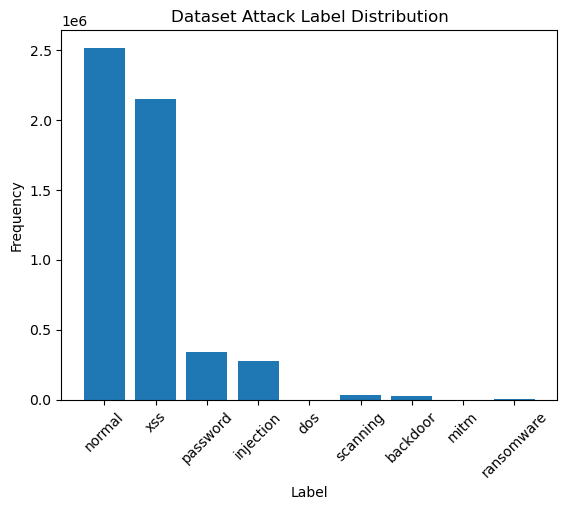

In [25]:
#The class distribution in the merged dataset

# Define the desired label arrangement
desired_labels = ['normal', 'xss', 'password', 'injection', "dos", 'scanning', "backdoor", "mitm", "ransomware"]

# Count the frequency of each label
label_counts = cleaned_first_dataset['Attack'].value_counts()
print(label_counts.reindex(desired_labels))

# Reorder the label counts based on the desired arrangement
label_counts_ordered = label_counts.reindex(desired_labels)

# Plot the bar chart
plt.bar(label_counts_ordered.index, label_counts_ordered.values)

# Plot the bar chart
# plt.bar(label_counts.index, label_counts.values, color=colors)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Dataset Attack Label Distribution')
plt.xticks(rotation = 45)

# Show the plot
plt.show()


## Feature Selection

#### More data cleaning and preprocessing before feature selection 
To enable the use of columns with texts and objects, some columns will be converted like the Timestamp column to its integer value in seconds, some columns also only contain zero so they will be dropped and the others which contain objects also will be encoded using label encoder which converts individual values in each column to a number starting from 0
The following columns will be encoded - 
1. Attack column (Each attack will be encoded with a number representing each attack)
2. Flow_ID (The flow_ID served as a unique identifier for each column it will be dropped)
3. Src_IP (IP Address)
4. Dst_IP (IP Address)
5. TimeStamp (Dates are stored in form of objects)
6. 'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'URG_Flag_Cnt', 'Fwd_Byts/b_Avg', 'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg',
       'Subflow_Bwd_Pkts', 'Flow_ID' (Contains only 0 so it would be dropped)  

#### 
 

In [26]:
#Perform Label encoding to change the values of the Attacks to digits
encoded_merged_dataset = pd.DataFrame(cleaned_first_dataset)
#Encode the labels 
Attack_encoder = LabelEncoder()
Src_IP_encoder = LabelEncoder()
Dst_IP_encoder = LabelEncoder()

encoded_merged_dataset['Attack'] = Attack_encoder.fit_transform(encoded_merged_dataset['Attack'])
encoded_merged_dataset['Src_IP'] = Src_IP_encoder.fit_transform(encoded_merged_dataset['Src_IP'])
encoded_merged_dataset['Dst_IP'] = Dst_IP_encoder.fit_transform(encoded_merged_dataset['Dst_IP'])

# Dropping the Flow_ID columns and the columns that contain zero throughout
encoded_merged_dataset = encoded_merged_dataset.drop(['Fwd_URG_Flags', 'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg', 'Bwd_PSH_Flags', 'Bwd_URG_Flags', 'URG_Flag_Cnt',
       'Fwd_Byts/b_Avg', 'Subflow_Bwd_Pkts', 'Flow_ID'], axis=1)

In [27]:
# Show the labels and their corresponding encoding for Attack column
dict(zip(Attack_encoder.classes_,range(len(Attack_encoder.classes_))))

{'backdoor': 0,
 'dos': 1,
 'injection': 2,
 'mitm': 3,
 'normal': 4,
 'password': 5,
 'ransomware': 6,
 'scanning': 7,
 'xss': 8}

In [28]:
# Show the labels and their corresponding encoding for Src_IP column
dict(zip(Src_IP_encoder.classes_,range(len(Src_IP_encoder.classes_))))

{'0.0.0.0': 0,
 '0.0.184.85': 1,
 '0.0.192.168': 2,
 '0.0.216.58': 3,
 '0.1.10.246': 4,
 '0.1.192.168': 5,
 '0.10.10.246': 6,
 '0.10.192.168': 7,
 '0.100.192.168': 8,
 '0.100.216.58': 9,
 '0.101.10.246': 10,
 '0.101.192.168': 11,
 '0.102.10.246': 12,
 '0.102.192.168': 13,
 '0.102.216.58': 14,
 '0.103.10.246': 15,
 '0.103.192.168': 16,
 '0.103.216.58': 17,
 '0.104.10.246': 18,
 '0.104.192.168': 19,
 '0.105.192.168': 20,
 '0.106.10.246': 21,
 '0.106.192.168': 22,
 '0.107.192.168': 23,
 '0.107.216.58': 24,
 '0.108.192.168': 25,
 '0.109.192.168': 26,
 '0.11.10.246': 27,
 '0.11.172.17': 28,
 '0.11.192.168': 29,
 '0.110.192.168': 30,
 '0.111.192.168': 31,
 '0.112.192.168': 32,
 '0.112.74.125': 33,
 '0.113.10.246': 34,
 '0.113.192.168': 35,
 '0.114.10.246': 36,
 '0.114.192.168': 37,
 '0.114.74.125': 38,
 '0.115.192.168': 39,
 '0.116.10.246': 40,
 '0.116.192.168': 41,
 '0.117.10.246': 42,
 '0.117.192.168': 43,
 '0.118.10.246': 44,
 '0.118.192.168': 45,
 '0.119.192.168': 46,
 '0.119.216.58': 47

In [29]:
# Show the labels and their corresponding encoding for Dst_IP column
dict(zip(Dst_IP_encoder.classes_,range(len(Dst_IP_encoder.classes_))))

{'0.0.0.0': 0,
 '0.1.192.168': 1,
 '0.11.192.168': 2,
 '0.3.192.168': 3,
 '0.5.192.168': 4,
 '0.7.192.168': 5,
 '0.8.192.168': 6,
 '1.1.192.168': 7,
 '1.1.239.255': 8,
 '1.133.192.168': 9,
 '1.152.114.216': 10,
 '1.152.124.10': 11,
 '1.152.126.3': 12,
 '1.152.13.35': 13,
 '1.152.151.101': 14,
 '1.152.170.5': 15,
 '1.152.173.234': 16,
 '1.152.18.2': 17,
 '1.152.189.77': 18,
 '1.152.192.168': 19,
 '1.152.195.245': 20,
 '1.152.2.240': 21,
 '1.152.20.114': 22,
 '1.152.210.57': 23,
 '1.152.212.207': 24,
 '1.152.224.0': 25,
 '1.152.23.36': 26,
 '1.152.248.96': 27,
 '1.152.255.255': 28,
 '1.152.27.174': 29,
 '1.152.3.122': 30,
 '1.152.39.49': 31,
 '1.152.5.174': 32,
 '1.152.61.1': 33,
 '1.152.7.133': 34,
 '1.152.90.1': 35,
 '1.169.172.217': 36,
 '1.169.192.168': 37,
 '1.169.216.58': 38,
 '1.169.40.90': 39,
 '1.169.52.255': 40,
 '1.169.74.125': 41,
 '1.180.172.17': 42,
 '1.180.173.194': 43,
 '1.180.192.168': 44,
 '1.180.202.158': 45,
 '1.180.216.58': 46,
 '1.184.107.115': 47,
 '1.184.119.104':

In [30]:
encoded_merged_dataset.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack
0,50591,0,683,0,0,25/04/2019 05:18:52 pm,47814343,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104571,1.195359e+07,1.433437e+07,30203068.0,14.0,47814343.0,1.195359e+07,1.433437e+07,30203068.0,14.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.104571,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1038036.0,0.000000e+00,1038036.0,1038036.0,5.187256e+14,8.984590e+14,1.556177e+15,1.657324e+07,4
1,44420,0,1539,0,0,25/04/2019 05:18:49 pm,2033142,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.983699,2.033142e+06,0.000000e+00,2033142.0,2033142.0,2033142.0,2.033142e+06,0.000000e+00,2033142.0,2033142.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.983699,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,4
2,82315,0,611,0,0,25/04/2019 05:18:37 pm,82877133,14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168925,6.375164e+06,4.413120e+06,12563772.0,226402.0,82877133.0,6.375164e+06,4.413120e+06,12563772.0,226402.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.168925,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1931160.5,1.711593e+06,3942470.0,226402.0,1.729085e+14,5.187256e+14,1.556177e+15,6.036493e+06,4
3,54574,0,7,0,0,25/04/2019 05:18:42 pm,24359,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.105177,2.435900e+04,0.000000e+00,24359.0,24359.0,24359.0,2.435900e+04,0.000000e+00,24359.0,24359.0,0.0,0.0,0.0,0.0,0.0,0,0,0,82.105177,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,4
4,54512,0,7,0,0,25/04/2019 05:18:42 pm,10239351,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292987,5.119676e+06,1.507128e+06,6185376.0,4053975.0,10239351.0,5.119676e+06,1.507128e+06,6185376.0,4053975.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.292987,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,4053975.0,0.000000e+00,4053975.0,4053975.0,7.780884e+14,1.100383e+15,1.556177e+15,6.185376e+06,4


In [31]:
# Extract the TimeStamp columns for conversion
datetime_strings = encoded_merged_dataset['Timestamp']

# Convert Timestamps to datetime objects
datetime_objects = pd.to_datetime(datetime_strings, format='%d/%m/%Y %I:%M:%S %p')

datetime_objects.head()

0   2019-04-25 17:18:52
1   2019-04-25 17:18:49
2   2019-04-25 17:18:37
3   2019-04-25 17:18:42
4   2019-04-25 17:18:42
Name: Timestamp, dtype: datetime64[ns]

In [32]:
# Convert datetime objects to seconds
datetime_seconds = datetime_objects.astype(int) // 10**9
datetime_seconds.head()

0    1556212732
1    1556212729
2    1556212717
3    1556212722
4    1556212722
Name: Timestamp, dtype: int64

In [33]:
# Change the values in the Timestamp column to its integer value 
encoded_merged_dataset['Timestamp'] = datetime_seconds
encoded_merged_dataset.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack
0,50591,0,683,0,0,1556212732,47814343,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104571,1.195359e+07,1.433437e+07,30203068.0,14.0,47814343.0,1.195359e+07,1.433437e+07,30203068.0,14.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.104571,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1038036.0,0.000000e+00,1038036.0,1038036.0,5.187256e+14,8.984590e+14,1.556177e+15,1.657324e+07,4
1,44420,0,1539,0,0,1556212729,2033142,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.983699,2.033142e+06,0.000000e+00,2033142.0,2033142.0,2033142.0,2.033142e+06,0.000000e+00,2033142.0,2033142.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.983699,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,4
2,82315,0,611,0,0,1556212717,82877133,14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168925,6.375164e+06,4.413120e+06,12563772.0,226402.0,82877133.0,6.375164e+06,4.413120e+06,12563772.0,226402.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.168925,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1931160.5,1.711593e+06,3942470.0,226402.0,1.729085e+14,5.187256e+14,1.556177e+15,6.036493e+06,4
3,54574,0,7,0,0,1556212722,24359,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.105177,2.435900e+04,0.000000e+00,24359.0,24359.0,24359.0,2.435900e+04,0.000000e+00,24359.0,24359.0,0.0,0.0,0.0,0.0,0.0,0,0,0,82.105177,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,4
4,54512,0,7,0,0,1556212722,10239351,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292987,5.119676e+06,1.507128e+06,6185376.0,4053975.0,10239351.0,5.119676e+06,1.507128e+06,6185376.0,4053975.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.292987,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,4053975.0,0.000000e+00,4053975.0,4053975.0,7.780884e+14,1.100383e+15,1.556177e+15,6.185376e+06,4


### Modelling Training and Testing

In [34]:
# Separating the dataset in preparation for feature selection 
X = encoded_merged_dataset.drop(columns=["Attack"])
Y = encoded_merged_dataset["Attack"]

In [35]:
#Get the training and test set from the depression dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state= 24)

In [36]:
# Count the frequency of all labels
label_counts = Y.value_counts()
print(label_counts.reindex())

Attack
4    2515236
8    2149308
5     340208
2     277696
7      36205
0      27145
6       5098
3        517
1        347
Name: count, dtype: int64


In [37]:
# Count the frequency of each label in the training data
label_counts = y_train.value_counts()
print(label_counts.reindex())

Attack
4    1760562
8    1504179
5     237922
2     194772
7      25653
0      18978
6       3564
3        356
1        246
Name: count, dtype: int64


In [38]:
# Count the frequency of each label in the test data
label_counts = y_test.value_counts()
print(label_counts.reindex())

Attack
4    754674
8    645129
5    102286
2     82924
7     10552
0      8167
6      1534
3       161
1       101
Name: count, dtype: int64


##### Training some models and get their performance on the dataset 

In [40]:
# Importing some models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#### DecisionTreeClassifier

In [41]:
# DecisionTreeClassifier Model Training
dt_model = DecisionTreeClassifier(random_state=30, max_depth=20)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=30)

In [42]:
#Get Models Prediction
y_pred = dt_model.predict(x_test)

In [43]:
y_pred

array([4, 4, 4, ..., 4, 8, 8])

In [39]:
def generateConfusionMatrix(y_pred, y_test):
    #Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    import seaborn as sns

    #Setting the labels
    
    labels = ['backdoor (0)', 'dos (1)', 'injection (2)', 'mitm (3)', 'normal (4)', 'password (5)', 'ransomware (6)', 'scanning (7)', 'xss (8)']

    #Plot the Confusion matrix graph
    fig= plt.figure(figsize=(8, 5))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g')
    ax.set_xlabel('Predicted Labels', fontsize=10)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)
    ax.xaxis.set_ticklabels(labels, fontsize = 5)
    ax.xaxis.tick_bottom()

    ax.set_ylabel('True Labels', fontsize=10)
    ax.yaxis.set_ticklabels(labels, fontsize = 10)
    plt.yticks(rotation=0)

    plt.title('Confusion Matrix', fontsize=15)

    # plt.savefig(name_of_model, 'KNN Depression.png')
    plt.show()

[[  8144      1      0      1      4      0     17      0      0]
 [     0     69      0     30      0      0      0      2      0]
 [     0      0  16927      1    125  16931      0      0  48940]
 [     1     53      1     98      1      4      0      1      2]
 [     2      0    222      2 747984    226     41      6   6191]
 [     0      0   6626      1     61  38702      0   2015  54881]
 [    18      0      0      0     28      0   1485      0      3]
 [     0      5      0      1      9   2618      0   1315   6604]
 [     0      0  21507      1   2561  43503      0   2088 575469]]


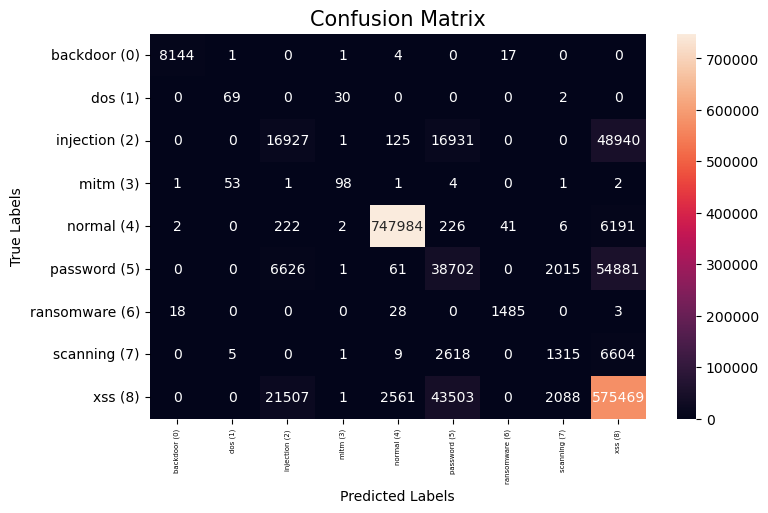

In [45]:
# Decision Tree Confusion Matrix
generateConfusionMatrix(y_pred, y_test)

In [55]:
#Classification report
print(classification_report(y_test, y_pred, target_names = ['backdoor (0)', 'dos (1)', 'injection (2)', 'mitm (3)', 'normal (4)', 'password (5)', 'ransomware (6)', 'scanning (7)', 'xss (8)']))

                precision    recall  f1-score   support

  backdoor (0)       1.00      1.00      1.00      8167
       dos (1)       0.54      0.68      0.60       101
 injection (2)       0.37      0.20      0.26     82924
      mitm (3)       0.73      0.61      0.66       161
    normal (4)       1.00      0.99      0.99    754674
  password (5)       0.38      0.38      0.38    102286
ransomware (6)       0.96      0.97      0.97      1534
  scanning (7)       0.24      0.12      0.16     10552
       xss (8)       0.83      0.89      0.86    645129

      accuracy                           0.87   1605528
     macro avg       0.67      0.65      0.65   1605528
  weighted avg       0.85      0.87      0.86   1605528



In [40]:
def ModelPerformanceGenerator(y_test, y_pred):
    # Evaluate the model using accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Print the evaluation metrics
    print("Accuracy: %.2f" %(accuracy*100))
    print("Precision: %.2f" %(precision*100))
    print("Recall: %.2f" %(recall*100))
    print("F1-score: %.2f" %(f1*100))

In [57]:
#
ModelPerformanceGenerator(y_test, y_pred)

Accuracy: 86.59
Precision: 67.20
Recall: 64.97
F1-score: 65.44


#### RandomForestClassifier

In [58]:
# RandomForestClassifier Model Training
rf_model = RandomForestClassifier(random_state=30)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=30)

In [59]:
#Get Models Prediction
y_pred = rf_model.predict(x_test)

[[  8144      0      0      0     11      0     12      0      0]
 [     0     52      3     43      0      0      0      3      0]
 [     0      1   6850      0     76  16144      0      0  59853]
 [     0     50      1    103      5      0      0      2      0]
 [     0      0    164      0 747931    169      7      7   6396]
 [     0      0  14192      0     74   9744      0   2754  75522]
 [    10      0      0      0     39      0   1485      0      0]
 [     0      5      0      1      5   3282      0    167   7092]
 [     0      0  51104      0   2701  69328      0   5514 516482]]


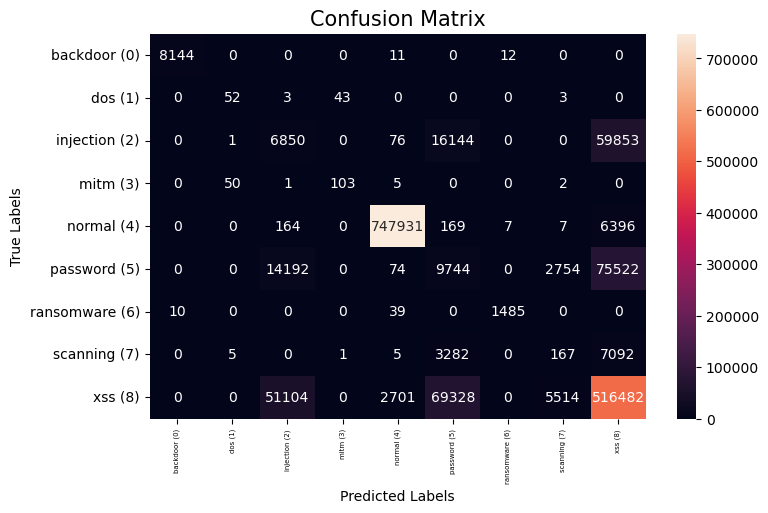

In [60]:
generateConfusionMatrix(y_pred, y_test)

In [61]:
#Classification report
print(classification_report(y_test, y_pred, target_names = ['backdoor (0)', 'dos (1)', 'injection (2)', 'mitm (3)', 'normal (4)', 'password (5)', 'ransomware (6)', 'scanning (7)', 'xss (8)']))

                precision    recall  f1-score   support

  backdoor (0)       1.00      1.00      1.00      8167
       dos (1)       0.48      0.51      0.50       101
 injection (2)       0.09      0.08      0.09     82924
      mitm (3)       0.70      0.64      0.67       161
    normal (4)       1.00      0.99      0.99    754674
  password (5)       0.10      0.10      0.10    102286
ransomware (6)       0.99      0.97      0.98      1534
  scanning (7)       0.02      0.02      0.02     10552
       xss (8)       0.78      0.80      0.79    645129

      accuracy                           0.80   1605528
     macro avg       0.57      0.57      0.57   1605528
  weighted avg       0.80      0.80      0.80   1605528



In [62]:
ModelPerformanceGenerator(y_test, y_pred)

Accuracy: 80.41
Precision: 57.27
Recall: 56.72
F1-score: 56.96


#### KNeighborsClassifier

In [41]:
# KNeighborsClassifier Model Training
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [42]:
#Get Models Prediction
y_pred = knn_model.predict(x_test)

[[  5085      0      0      0   3082      0      0      0      0]
 [     0      6      0      4     91      0      0      0      0]
 [     0      1  12464      0  32196   5395      0    157  32711]
 [     0      8      0     31    122      0      0      0      0]
 [   986     13  20301     27 486722  15759    178   1080 229608]
 [     0      0   6521      0  39761  11416      0    462  44126]
 [     0      0      0      0   1365      0    169      0      0]
 [     0      3    724      0   4522   1049      0    363   3891]
 [     0      0  29481      0 247870  26397      0   1144 340237]]


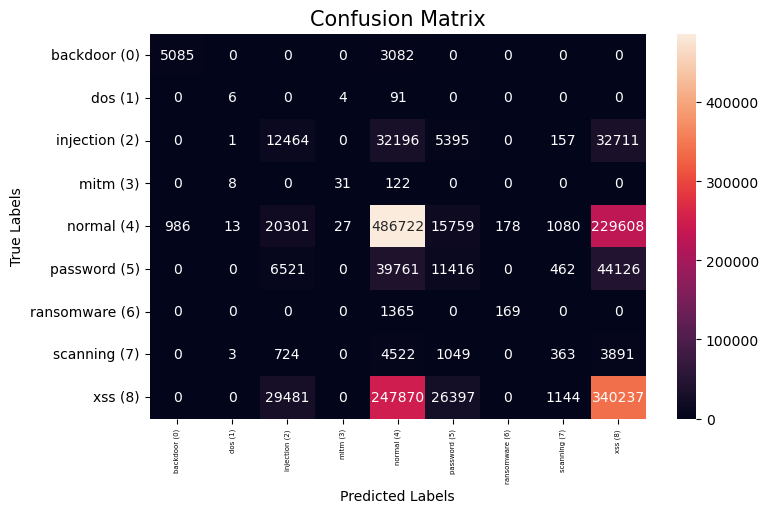

In [46]:
generateConfusionMatrix(y_pred, y_test)

In [47]:
#Classification report
print(classification_report(y_test, y_pred, target_names = ['backdoor (0)', 'dos (1)', 'injection (2)', 'mitm (3)', 'normal (4)', 'password (5)', 'ransomware (6)', 'scanning (7)', 'xss (8)']))

                precision    recall  f1-score   support

  backdoor (0)       0.84      0.62      0.71      8167
       dos (1)       0.19      0.06      0.09       101
 injection (2)       0.18      0.15      0.16     82924
      mitm (3)       0.50      0.19      0.28       161
    normal (4)       0.60      0.64      0.62    754674
  password (5)       0.19      0.11      0.14    102286
ransomware (6)       0.49      0.11      0.18      1534
  scanning (7)       0.11      0.03      0.05     10552
       xss (8)       0.52      0.53      0.53    645129

      accuracy                           0.53   1605528
     macro avg       0.40      0.27      0.31   1605528
  weighted avg       0.52      0.53      0.52   1605528



In [48]:
ModelPerformanceGenerator(y_test, y_pred)

Accuracy: 53.35
Precision: 40.23
Recall: 27.26
F1-score: 30.72


##### Extract New Dataset with suggested features: The Genetic Algorithm has suggested the above dataset features (columns) as the best for IOT network intrusion detection

In [41]:
#In case of kernel restart 
selected_features_indices = [0,  1,  2,  3,  5, 10, 11, 16, 19, 20, 22, 23, 25, 26, 28, 29, 30,
       33, 34, 35, 36, 37, 38, 42, 43, 45, 48, 49, 51, 52, 53, 55, 57, 61,
       63, 64, 65, 69, 73]

In [42]:
# Generate the subset of GA selected feature columns
x_train_subset = x_train.iloc[:, selected_features_indices]
x_test_subset = x_test.iloc[:, selected_features_indices]

In [43]:
#Showing the GA proposed training dataset
x_train_subset.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Timestamp,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Std,Flow_IAT_Max,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Pkt_Len_Mean,Pkt_Len_Std,FIN_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Bwd_Seg_Size_Avg,Bwd_Pkts/b_Avg,Subflow_Bwd_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Min,Idle_Min
2540667,59680,39700,1600,80,1556387352,1261.0,1448.0,0.0,4126.858567,10.657597,1.478230e+05,331139.0,844468.0,168893.6,349065.0,170.0,352096.0,351785.0,311.0,0,200,104,7.105065,348.5,584.473030,1,2,8,0,0.0,387.222222,420.333333,0,140,123,2,32,0.0,1.556351e+15
2913689,59677,33917,683,53,1556389540,90.0,37.0,37.0,19910.161467,485.613694,3.812051e+03,7139.0,313.0,313.0,313.0,313.0,785.0,785.0,785.0,0,16,16,242.806847,40.2,7.155418,0,0,0,0,1.0,50.250000,45.000000,4,22,0,1,8,0.0,1.556354e+15
4393280,59662,80,710,39362,1556399070,0.0,0.0,0.0,0.000000,14492.753623,0.000000e+00,138.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,32,32,7246.376812,0.0,0.000000,1,0,2,0,1.0,0.000000,0.000000,0,0,243,0,32,0.0,1.556363e+15
258997,80550,0,41,0,1556584416,0.0,0.0,0.0,0.000000,1.092854,1.952932e+06,4950568.0,6405246.0,1067541.0,4950568.0,1.0,0.0,0.0,0.0,0,0,0,1.092854,0.0,0.000000,0,0,0,0,0.0,0.000000,0.000000,0,0,0,0,0,0.0,1.556548e+15
5033379,59677,56752,683,53,1556402033,90.0,37.0,37.0,56924.678931,1388.406803,1.111599e+03,2220.0,117.0,117.0,117.0,117.0,544.0,544.0,544.0,0,16,16,694.203402,40.2,7.155418,0,0,0,0,1.0,50.250000,45.000000,4,22,0,1,8,0.0,1.556366e+15


In [44]:
#Showing the GA proposed training dataset
x_test_subset.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Timestamp,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Std,Flow_IAT_Max,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Pkt_Len_Mean,Pkt_Len_Std,FIN_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Bwd_Seg_Size_Avg,Bwd_Pkts/b_Avg,Subflow_Bwd_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Min,Idle_Min
1181185,59668,80,703,49586,1556379043,0.0,0.0,0.0,0.0,423.280423,0.0,4725.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,32,32,211.640212,0.0,0.0,1,0,2,0,1.0,0.0,0.0,0,0,251,0,32,0.0,1.556343e+15
1710143,112943,80,703,34580,1556382029,0.0,0.0,0.0,0.0,13245.033113,0.0,151.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,32,32,6622.516556,0.0,0.0,1,0,2,0,1.0,0.0,0.0,0,0,251,0,32,0.0,1.556346e+15
2766317,50017,80,706,57456,1556390508,0.0,0.0,0.0,0.0,15037.593985,0.0,133.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,32,32,7518.796992,0.0,0.0,1,0,2,0,1.0,0.0,0.0,0,0,237,0,32,0.0,1.556355e+15
4397648,50017,80,710,59692,1556400821,0.0,0.0,0.0,0.0,2518.891688,0.0,794.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,32,32,1259.445844,0.0,0.0,1,0,2,0,1.0,0.0,0.0,0,0,237,0,32,0.0,1.556365e+15
3224168,59677,54036,697,80,1556393436,0.0,0.0,0.0,0.0,166666.666667,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,20,20,83333.333333,0.0,0.0,1,0,2,0,1.0,0.0,0.0,0,0,1025,0,20,0.0,1.556357e+15


In [45]:
x_train_subset.columns

Index(['Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Timestamp',
       'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Flow_Byts/s',
       'Flow_Pkts/s', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Tot',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Fwd_Header_Len',
       'Bwd_Header_Len', 'Fwd_Pkts/s', 'Pkt_Len_Mean', 'Pkt_Len_Std',
       'FIN_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'ECE_Flag_Cnt',
       'Down/Up_Ratio', 'Pkt_Size_Avg', 'Bwd_Seg_Size_Avg', 'Bwd_Pkts/b_Avg',
       'Subflow_Bwd_Byts', 'Init_Bwd_Win_Byts', 'Fwd_Act_Data_Pkts',
       'Fwd_Seg_Size_Min', 'Active_Min', 'Idle_Min'],
      dtype='object')

In [46]:
# Reshape the datasets from 2d to 3d because of the type of input of the BiLSTM model
reshaped_x_train_subset = np.expand_dims(x_train_subset, axis=-1)  # Assuming feature dimension is 1
reshaped_x_test_subset = np.expand_dims(x_test_subset, axis=-1)  # Assuming feature dimension is 1

In [47]:
# New shape of the dataset
reshaped_x_train_subset.shape
# reshaped_x_test_subset.shape

(3746232, 39, 1)

### The BiLSTM model

In [48]:
# The importing important modules
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [49]:
# Creating the structure of the BiLSTM model

# Define the BiLSTM model
BiLSTM_model = Sequential()
BiLSTM_model.add(Bidirectional(LSTM(128), input_shape=(x_train_subset.shape[1], 1))) 
BiLSTM_model.add(Dropout(0.2))
BiLSTM_model.add(Dense(9, activation='softmax'))
# Compiling the model
BiLSTM_model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

/opt/anaconda3/envs/feyi/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
#Model summary
BiLSTM_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 256)            │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,690 (530.04 KB)

 Trainable params: 135,690 (530.04 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Early stopping and learning rate reduction to improve performance and avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0001)

In [52]:
# Model training 
BiLSTM_model_history = BiLSTM_model.fit(x_train_subset, y_train, epochs=30, validation_split=0.3, shuffle=True, batch_size=128, callbacks=[early_stopping, reduce_lr])

Epoch 1/30
20488/20488 ━━━━━━━━━━━━━━━━━━━━ 1471s 72ms/step - accuracy: 0.8480 - loss: 0.4402 - val_accuracy: 0.8698 - val_loss: 0.3626 - learning_rate: 0.0010
Epoch 2/30
20488/20488 ━━━━━━━━━━━━━━━━━━━━ 1470s 72ms/step - accuracy: 0.8684 - loss: 0.3676 - val_accuracy: 0.8630 - val_loss: 0.3784 - learning_rate: 0.0010
Epoch 3/30
20488/20488 ━━━━━━━━━━━━━━━━━━━━ 4012s 196ms/step - accuracy: 0.8686 - loss: 0.3665 - val_accuracy: 0.8692 - val_loss: 0.3602 - learning_rate: 0.0010
Epoch 4/30
20488/20488 ━━━━━━━━━━━━━━━━━━━━ 2210s 108ms/step - accuracy: 0.8693 - loss: 0.3636 - val_accuracy: 0.8686 - val_loss: 0.3658 - learning_rate: 0.0010
Epoch 5/30
20488/20488 ━━━━━━━━━━━━━━━━━━━━ 2222s 108ms/step - accuracy: 0.8682 - loss: 0.3664 - val_accuracy: 0.8692 - val_loss: 0.3622 - learning_rate: 0.0010
Epoch 6/30
20488/20488 ━━━━━━━━━━━━━━━━━━━━ 2175s 106ms/step - accuracy: 0.8694 - loss: 0.3611 - val_accuracy: 0.8700 - val_loss: 0.3567 - learning_rate: 5.0000e-04
Epoch 7/30
20488/20488 ━━━━━━━━━

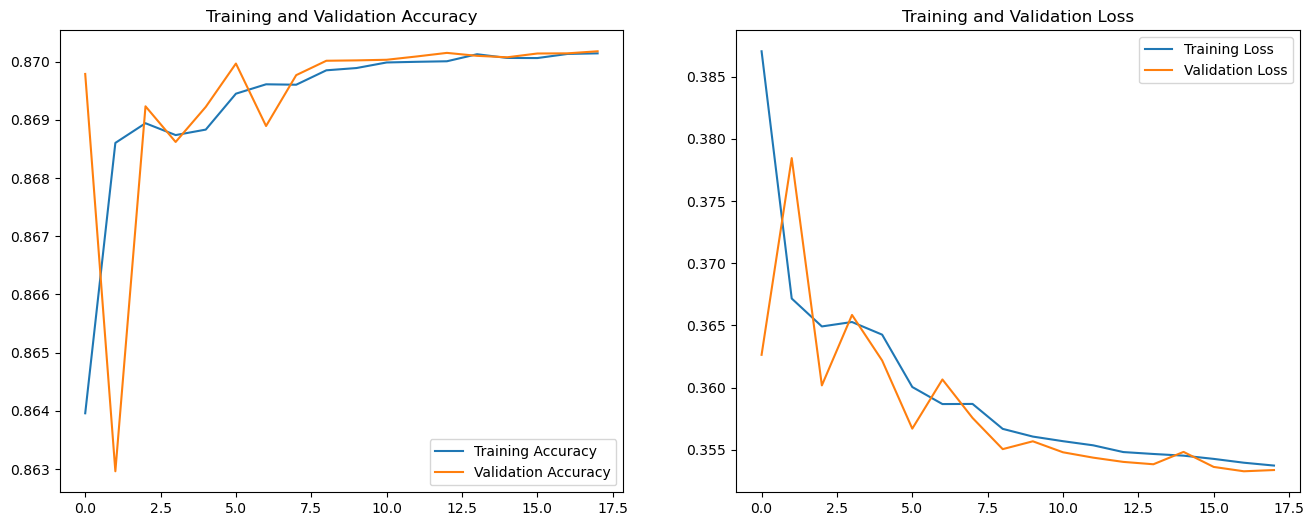

In [64]:
#Plotting the BiLSTM model results

#Getting the accuracy
acc = BiLSTM_model_history.history['accuracy']
val_acc = BiLSTM_model_history.history['val_accuracy']

#Getting the losses
loss = BiLSTM_model_history.history['loss']
val_loss = BiLSTM_model_history.history['val_loss']

#No of epochs it trained
epochs_range = BiLSTM_model_history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [54]:
# Evaluating the model's accuracy on the test data
evaluation_result = BiLSTM_model.evaluate(x_test_subset, y_test)

50173/50173 ━━━━━━━━━━━━━━━━━━━━ 627s 12ms/step - accuracy: 0.8708 - loss: 0.3507


In [55]:
print("Loss of the model is - " , evaluation_result[0])
print("Accuracy of the model is - " , evaluation_result[1]*100 , "%")

Loss of the model is -  0.3515394926071167
Accuracy of the model is -  87.0775818824768 %


In [56]:
#Get model's prediction on the test data
BiLSTM_model_predictions = BiLSTM_model.predict(x_test_subset)

50173/50173 ━━━━━━━━━━━━━━━━━━━━ 681s 14ms/step


In [57]:
BiLSTM_model_predictions

array([[1.53352218e-07, 9.65347891e-09, 2.18373462e-08, ...,
        5.28298472e-09, 1.07127775e-07, 3.20953489e-16],
       [9.09156839e-08, 5.74187853e-09, 1.73900947e-08, ...,
        3.97788291e-09, 8.43837071e-08, 2.42820153e-16],
       [9.59153468e-08, 5.94631100e-09, 1.86829485e-08, ...,
        4.13589385e-09, 8.95939607e-08, 2.43223420e-16],
       ...,
       [6.96238289e-10, 9.98336396e-12, 2.91100976e-12, ...,
        5.85978586e-13, 2.52015925e-11, 2.41328145e-18],
       [3.52960370e-07, 2.98073473e-07, 4.71139438e-02, ...,
        2.51892689e-05, 9.36197579e-01, 1.20326218e-15],
       [1.92252037e-09, 2.20721267e-06, 2.88355798e-01, ...,
        1.24684228e-02, 5.64805984e-01, 5.76331604e-12]], dtype=float32)

In [58]:
#convert the models prediction value here so it will just be inform of 0,1,2,3,...
y_pred = np.argmax(BiLSTM_model_predictions, axis=-1) 

In [59]:
y_pred

array([4, 4, 4, ..., 4, 8, 8])

[[  8060      0      0      2      3      0      6      0      0]
 [     0     23      0     15      0      0      0      2      2]
 [     0      0      7      0      0      1      0      0     12]
 [     0      4      0     10      0      0      0      0      1]
 [    59     16      8     69 743555      4    110      0    112]
 [     0      0      9      0      1    166      0     44    184]
 [    43      0      0      0    205      0   1418      0      1]
 [     0      0      0      0      0      0      0      0      1]
 [     5     58  82900     65  10910 102115      0  10506 644816]]


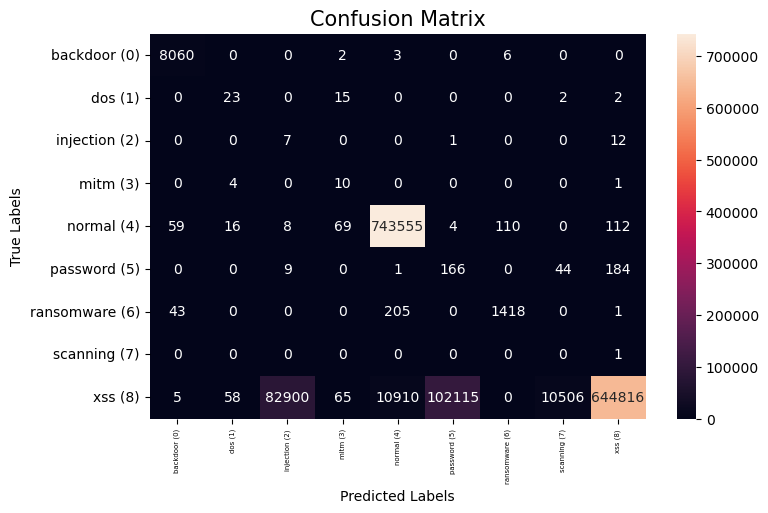

In [62]:
#Import confusion_matrix for evaluation
generateConfusionMatrix(y_test, y_pred)

In [65]:
#Classification report
print(classification_report(y_test, y_pred, target_names = ['backdoor (0)', 'dos (1)', 'injection (2)', 'mitm (3)', 'normal (4)', 'password (5)', 'ransomware (6)', 'scanning (7)', 'xss (8)']))

                precision    recall  f1-score   support

  backdoor (0)       1.00      0.99      0.99      8167
       dos (1)       0.55      0.23      0.32       101
 injection (2)       0.35      0.00      0.00     82924
      mitm (3)       0.67      0.06      0.11       161
    normal (4)       1.00      0.99      0.99    754674
  password (5)       0.41      0.00      0.00    102286
ransomware (6)       0.85      0.92      0.89      1534
  scanning (7)       0.00      0.00      0.00     10552
       xss (8)       0.76      1.00      0.86    645129

      accuracy                           0.87   1605528
     macro avg       0.62      0.47      0.46   1605528
  weighted avg       0.82      0.87      0.82   1605528



In [66]:
ModelPerformanceGenerator(y_test, y_pred)

Accuracy: 87.08
Precision: 62.01
Recall: 46.53
F1-score: 46.35


In [ ]:
#Save the model
BiLSTM_model.save("saved_model/Latest_BiLSTM_model_first_dataset.keras")